# Feature Selection

# 1. Feature Selection

Feature selection are two important processes in data science that help improve the performance and interpretability of machine learning models. Let's discuss it in more detail.

## Feature Selection:

Feature selection involves identifying the most relevant features from a given set of features to improve model performance and reduce overfitting. The goal is to select a subset of features that provide the most valuable information while discarding redundant or irrelevant features. Feature selection offers several benefits, including reduced model complexity, improved interpretability, and faster model training and inference. Here are some common techniques for feature selection:

a. Filter Methods: These methods assess the relevance of features based on statistical measures or scoring metrics such as correlation, chi-square test, mutual information, or variance threshold. Features are ranked or scored individually, and a threshold is set to select the top-ranked features.

b. Wrapper Methods: These methods evaluate feature subsets by training and evaluating the model's performance using different feature combinations. Techniques like forward selection, backward elimination, or recursive feature elimination (RFE) iteratively add or remove features based on their impact on model performance.

c. Embedded Methods: These methods incorporate feature selection within the model training process itself. Certain machine learning algorithms, such as Lasso (L1 regularization) or decision trees, inherently perform feature selection during training, assigning lower weights or pruning irrelevant features.

d. Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) or Singular Value Decomposition (SVD) reduce the dimensionality of the feature space by projecting the data onto a lower-dimensional subspace while preserving the most important information.

e. Feature Importance from Models: Some models, such as Random Forests or Gradient Boosting Machines (GBMs), provide feature importance scores based on how much each feature contributes to the model's performance. These scores can be used to rank or select features.

## 1.0 Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


## 1.1 Filter Methods
These methods assess the relevance of features based on statistical measures or scoring metrics such as correlation, chi-square test, mutual information, or variance threshold. Features are ranked or scored individually, and a threshold is set to select the top-ranked features.

<AxesSubplot:>

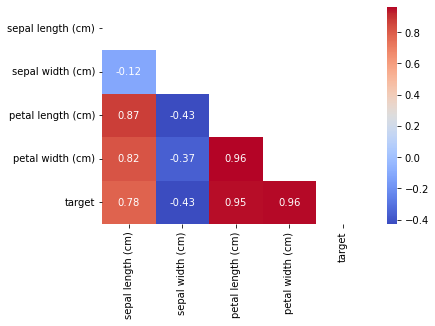

In [4]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
                     
# Compute the correlation matrix
corr_matrix = data.corr()

# Create a mask to display only the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the correlation matrix
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')

In this example, we compute the correlation matrix for the iris dataset and visualize it using a heatmap. You can identify highly correlated features based on the heatmap and select a subset of features with lower correlation for your model.

## 1.2 Wrapper Method using Recursive Feature Elimination (RFE) with Logistic Regression
These methods evaluate feature subsets by training and evaluating the model's performance using different feature combinations. Techniques like forward selection, backward elimination, or recursive feature elimination (RFE) iteratively add or remove features based on their impact on model performance.

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
y = iris['target']

# Create a logistic regression model
model = LogisticRegression()

# Perform recursive feature elimination
rfe = RFE(estimator=model, n_features_to_select=2)
X_selected = rfe.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = rfe.get_support(indices=True)
selected_feature_names = [iris['feature_names'][idx] for idx in selected_feature_indices]

In [6]:
selected_feature_names

['petal length (cm)', 'petal width (cm)']

In this modified example, we use RFE with logistic regression to recursively eliminate features and select the top 2 features from the Iris dataset based on their importance.

## 1.3 Embedded Method using Random Forest Feature Importance:



In [7]:
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
y = iris['target']

# Create a random forest classifier
model = RandomForestClassifier()

# Fit the model to the data
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the top k feature names
k = 2
selected_feature_names = [iris['feature_names'][idx] for idx in indices[:k]]

In [8]:
selected_feature_names

['petal width (cm)', 'petal length (cm)']

In this modified example, we use a random forest classifier to estimate the feature importance scores from the Iris dataset. Features are ranked based on their importance, and you can select the top k features for your model.

# 2. Exercise: Feature Selection

Given a dataset with multiple features, perform the following feature selection tasks:

a) Calculate the correlation matrix for the dataset and identify highly correlated features. Remove one of the features from each highly correlated pair to reduce redundancy.

b) Use a filter-based feature selection method, such as mutual information or ANOVA, to rank the features based on their relevance to the target variable.

c) Implement recursive feature elimination (RFE) with a machine learning algorithm of your choice to select the top k features.

d) Train a random forest model on the dataset and extract the feature importances. Select the top features based on their importance scores.

e) Compare the performance of different feature selection methods by evaluating the model's accuracy or other relevant metrics on a validation dataset.

In [9]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np


# Load the Boston Housing dataset
boston = load_boston()
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])